In [105]:
# import customize_motif_vector
from glypy.io import glycoct
import extract_motif
from glypy.algorithms.subtree_search import subtree_of
import customize_motif_vec
import glycan_io
import extract_motif
import motif_class
import __init__
import json_utility
import glycan_profile
from importlib import reload
import pandas as pd
reload(__init__)
reload(extract_motif)
reload(motif_class)
reload(glycan_profile)
import seaborn as sns
import plot_glycan_utilities
reload(plot_glycan_utilities)
import matplotlib.pyplot as plt
from glypy.io import glycoct, iupac
import numpy as np

%matplotlib inline


In [9]:
# abundance_data_table = json_utility.load_json("../generated_json_file/NBT_dict_name_abundance_cross_profile.json")
match_dict = json_utility.load_json(__init__.json_address + "match_dict.json")
# load glycoprofile Mass Spectrum m/z and glycan structure info
# load CHO paper abundance table
mz_abd_table = glycan_profile.load_cho_mz_abundance()
# load glycoprofile Mass Spectrum m/z and glycan structure info
profile_mz_to_id = glycan_profile.load_glycan_profile_dic()
# normalize CHO abundance table
norm_mz_abd_dict = glycan_profile.get_norm_mz_abd_table(mz_abd_table)

glycoprofile_list = glycan_profile.get_glycoprofile_list(profile_mz_to_id, norm_mz_abd_dict, match_dict)
# get table generator and generate existance table
table_generator = glycan_profile.MotifAbdTableGenerator(glycoprofile_list)
motif_existance_table = table_generator.table_existance()
# print(motif_existance_table.head())
# motif_abd_table.head()

# load motif vector and return edge_list
# motif_vector = json_utility.load_json("../generated_json_file/Unicarbkb_motif_vec_12259.json")
# motif_lib = gc_gl`ycan_motif.GlycanMotifLib(motif_dict)

nglycan_motif_lab = motif_class.MotifLabNGlycan(json_utility.load_json(__init__.merged_motif_dict_addr)) # unicarbkb_motifs_12259.json
motif_vec = nglycan_motif_lab.motif_vec
tree_type_dp, edge_list = nglycan_motif_lab.get_dependence_tree_ncore()
# hier_enrich_glycoprofile_occurence(glycoprofile, scoredMotifs_occurence_vector, np.array(edge_list),motif_vector)

mz_list 57 profile_list 37
57 37
<class 'str'>
start motif_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
Finish the n-glycan match  716  motifs are matched to the n-glycan core
start building dependence_tree
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


# In degree, out degree, ttest, corr analysis

In [303]:
reload(motif_class)
_a = motif_class.NodesState(nglycan_motif_lab.motif_dep_tree_ncore, motif_class.get_weight_dict(table_generator.table_against_wt_relative_abd()))
_a.threshold=200
len(_a.motif_weight[1])
_a.get_node_value()
out_degree_list, in_degree_list = _a.get_edge_node_degree()
p_value_list = _a.get_edge_ttest_dis()
corr_list = _a.get_edge_corr_dis()


In [304]:
p_table = pd.DataFrame({'out_d':out_degree_list, 'in_d':in_degree_list, 'p_value':p_value_list, 'correlation':corr_list})

In [280]:
p_mod = p_table[p_table.p_value < 200]
p_mod = p_mod[p_mod.p_value>0]
p_mod.head()

,correlation,in_d,out_d,p_value
1,0.977162,1,3,80.235665
3,0.954099,1,4,59.083162
4,0.807724,1,4,30.269439
5,0.932438,1,4,41.288328
6,0.981845,2,4,117.044580


# edges' p-value distribution

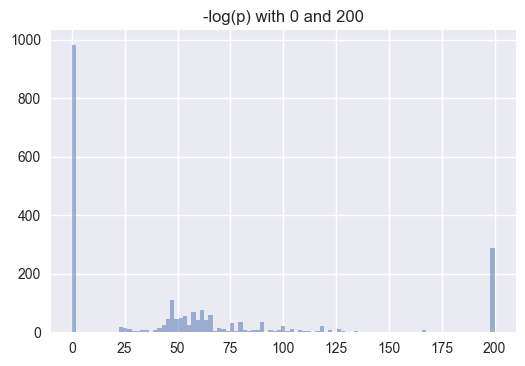

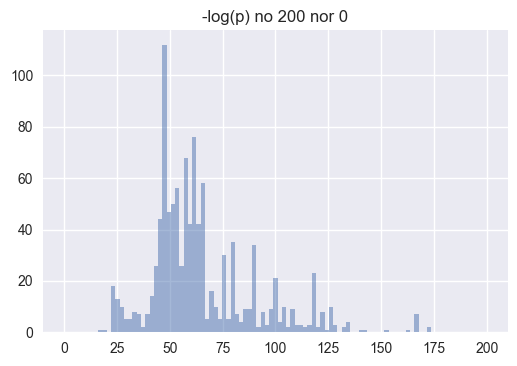

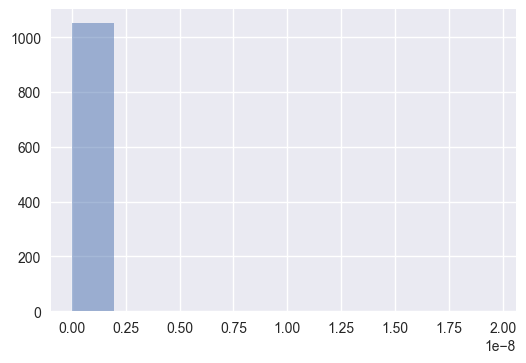

In [314]:
bins = np.linspace(0, 200, 100)
plt.hist(p_table.p_value, bins, alpha=0.5)
# plt.hist(x_1, bins, alpha=0.5)
plt.title('-log(p) with 0 and 200')
plt.show()
plt.hist(p_mod.p_value, bins, alpha=0.5)
# plt.hist(x_1, bins, alpha=0.5)
plt.title('-log(p) no 200 nor 0')
plt.show()
_p = [np.exp(-i) for i in p_mod.p_value]
# bins = np.linspace(0, 0.01, 100)
plt.hist(_p,alpha=0.5)
plt.show()


# nodes' p-value distribution

# same, one diff vs node's degree

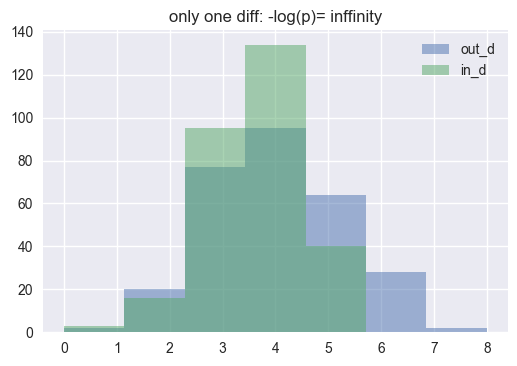

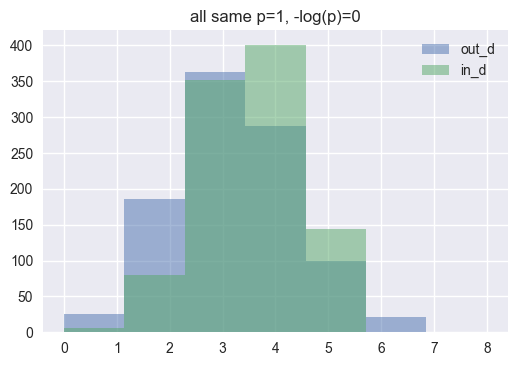

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=2.75545529808e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x12a605da0>)

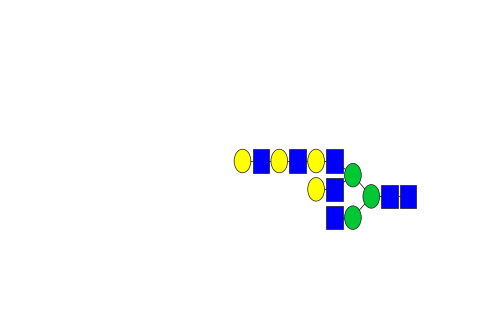

In [308]:
neg_log_p_200 = p_table[p_table.p_value==200]
neg_log_p_0 = p_table[p_table.p_value==0]
bins = np.linspace(0, 8, 8)
plt.hist(neg_log_p_200.out_d, bins, alpha=0.5)
plt.hist(neg_log_p_200.in_d, bins, alpha=0.5)
plt.legend(['out_d', 'in_d'])
plt.title('only one diff: -log(p)= inffinity')
plt.show()
plt.hist(neg_log_p_0.out_d, bins, alpha=0.5)
plt.hist(neg_log_p_0.in_d, bins, alpha=0.5)
plt.title('all same p=1, -log(p)=0')
plt.legend(['out_d', 'in_d'])
plt.show()
_temp_out_list = []
_temp_in_list = []
p_larger5 = p_table[p_table.out_d>5]
for i in p_table[p_table.out_d>5].index:
    _temp_out_list.append(_a.edge[i][0])
    _temp_in_list.append(_a.edge[i][1])
p_larger5['out_node'] = _temp_out_list
p_larger5['in_node'] = _temp_in_list

p_larger5
plot_glycan_utilities.plot_glycan(motif_vec[1065])

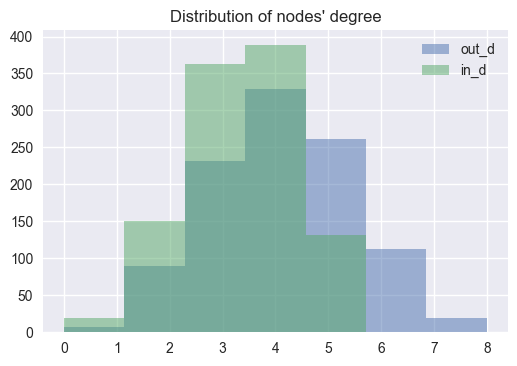

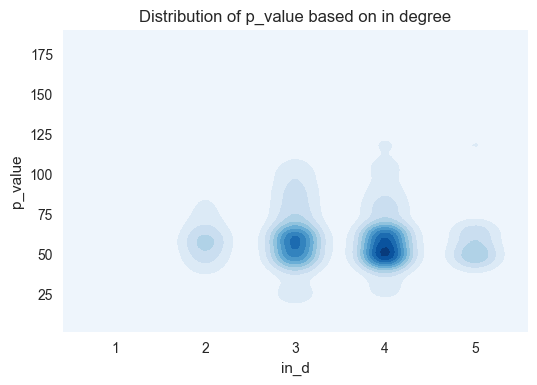

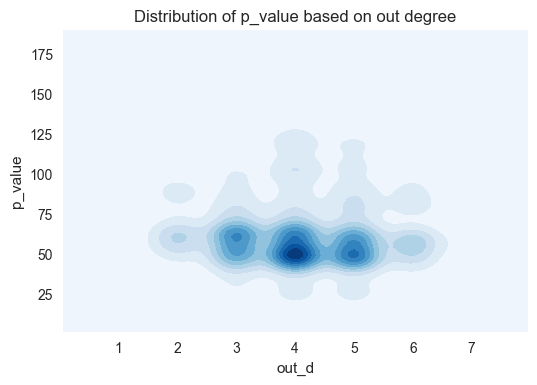

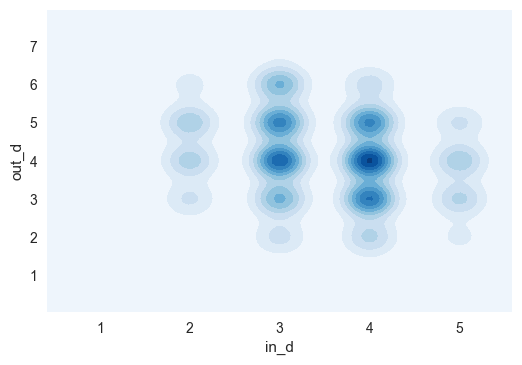

In [283]:
bins = np.linspace(0, 8, 8)
plt.hist(p_mod.out_d, bins, alpha=0.5)
plt.hist(p_mod.in_d, bins, alpha=0.5)
plt.legend(['out_d', 'in_d'])
plt.title("Distribution of nodes' degree")
plt.show()
# in_degree_list
out_degree_list, in_degree_list = _a.get_edge_node_degree()
# print(out_degree_list, in_degree_list)
# plt.plot(out_degree_list, )
# library & dataset
import seaborn as sns

# Basic 2D density plot
# sns.set_style("white")
sns.kdeplot(p_mod.in_d, p_mod.p_value, cmap="Blues", shade=True, shade_lowest=True,)
# sns.jointplot(x=p_mod.in_d, y=p_mod.p_value, kind='kde', color="skyblue")
plt.title("Distribution of p_value based on in degree")
plt.show()

# Custom it with the same argument as 1D density plot
sns.kdeplot(p_mod.out_d, p_mod.p_value, cmap="Blues", shade=True, shade_lowest=True,)
# sns.jointplot(x=p_mod.out_d, y=p_mod.p_value, kind='kde', color="skyblue")
plt.title("Distribution of p_value based on out degree")

plt.show()
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(p_mod.in_d, p_mod.out_d, cmap="Blues", shade=True, shade_lowest=True, )

plt.show()


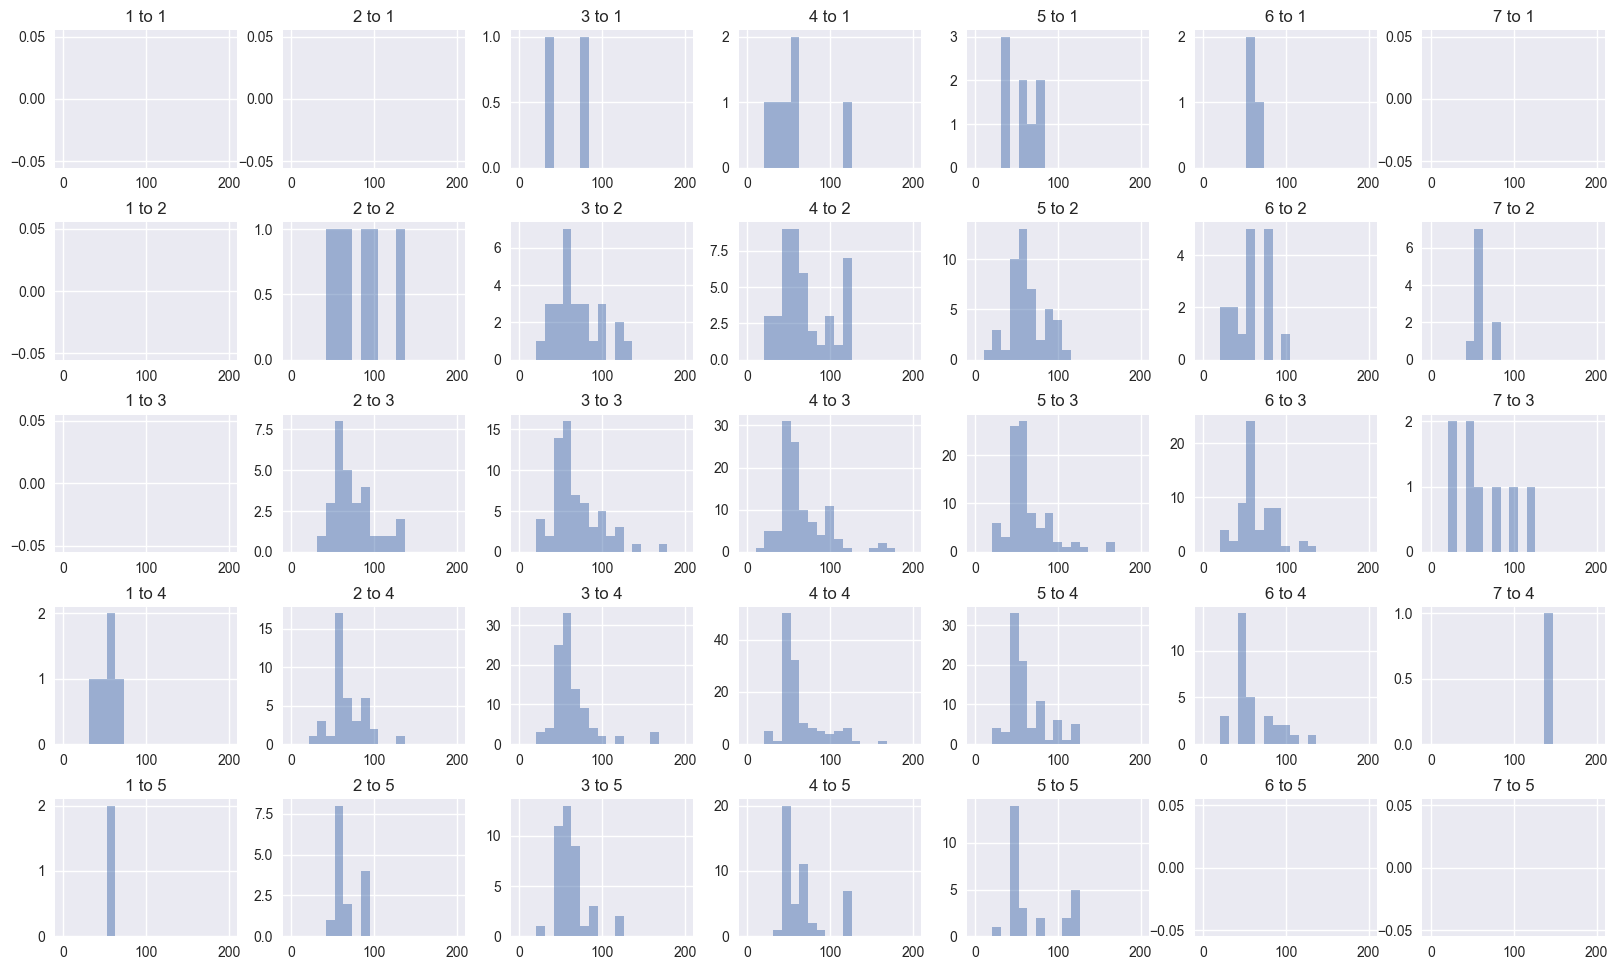

In [284]:

fig, axes = plt.subplots(5, 7, squeeze=True)
plt.title('p_value distribution')
fig.set_size_inches(20, 12)

for i in range(1,8):
    for j in range(1,6):
#         _str = "68"+str()
#         plt.subplot()
        temp_table = p_table[p_table.in_d == j]
        temp_table = temp_table[temp_table.out_d == i]
        temp_table = temp_table[temp_table.p_value > 0]
        temp_table = temp_table[temp_table.p_value < 200]

        bins = np.linspace(0, 200, 20)
        
        axes[j-1,i-1].hist(temp_table.p_value, bins, alpha=0.5)
#         axes[j-1,i-1].hist(temp_table.p_value, bins, alpha=0.5)
#         axes[j-1,i-1].legend(, 'in_d'])
        axes[j-1,i-1].set_title(str(i)+" to "+str(j))
# sns.jointplot(x=p_mod.in_d, y=p_mod.out_d, kind='kde', color="skyblue")
plt.subplots_adjust(wspace=0.25, hspace=0.4)
plt.show()

# Correlation vs TTest

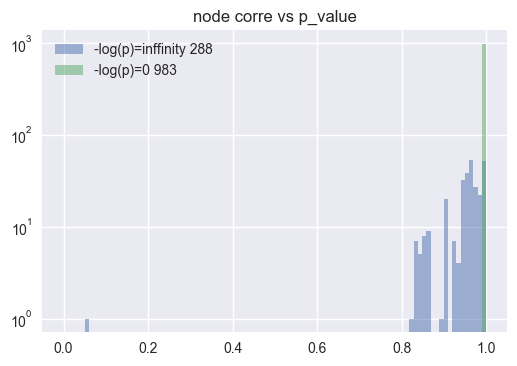

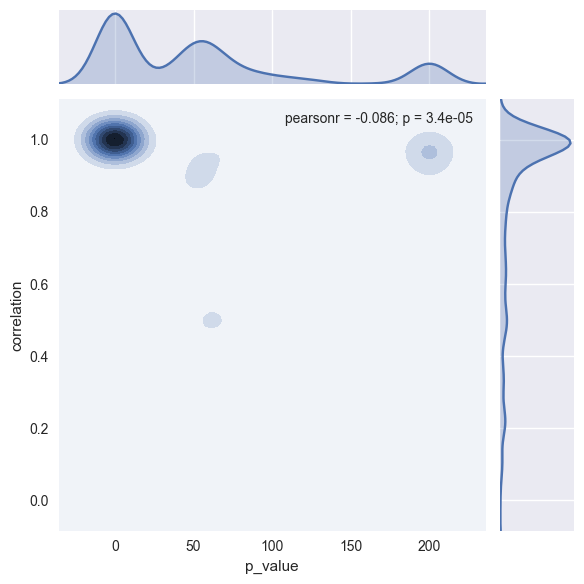

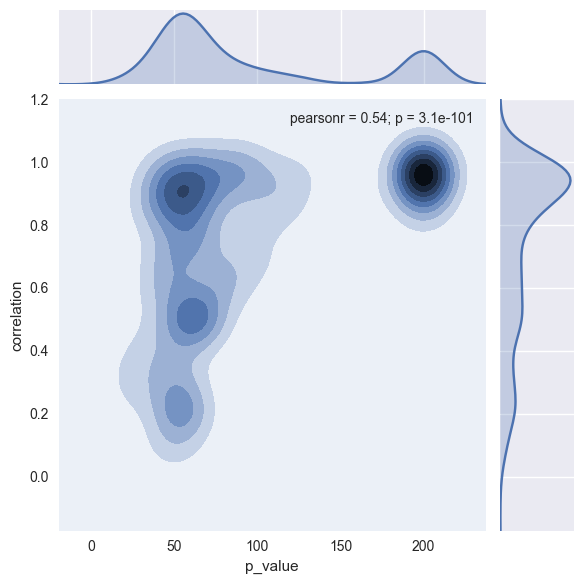

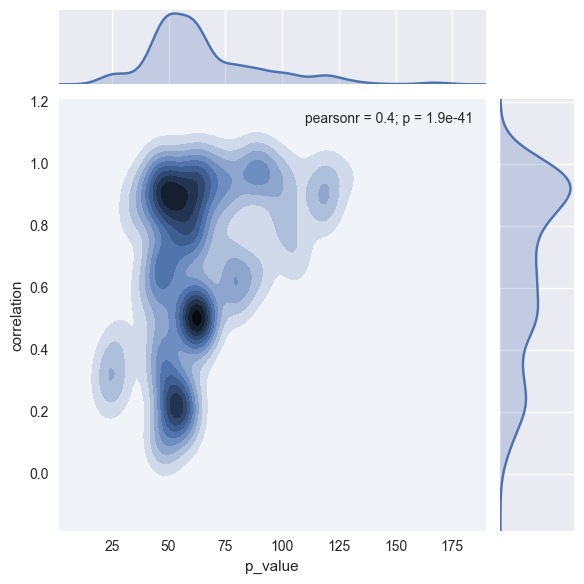

In [299]:
bins = np.linspace(0, 1, 100)
plt.hist(neg_log_p_200.correlation, bins, alpha=0.5, )
plt.hist(neg_log_p_0.correlation, bins, alpha=0.5, )
plt.yscale('log', nonposy='clip')
plt.title('node corre vs p_value')
plt.legend(['-log(p)=inffinity '+str(len(neg_log_p_200.correlation)), '-log(p)=0 '+str(len(neg_log_p_0.correlation))])
# sns.kdeplot(neg_log_p_200.p_value, neg_log_p_200.correlation, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()

# sns.kdeplot(p_table.p_value, p_table.correlation, cmap="Blues", shade=True, shade_lowest=True, title = 'all')
sns.jointplot(p_table.p_value, p_table.correlation, kind='kde')

plt.show()
p_no_same = p_table[p_table.p_value >0]
# sns.kdeplot(p_no_same.p_value, p_no_same.correlation, cmap="Blues", shade=True, shade_lowest=True, )
sns.jointplot(p_no_same.p_value, p_no_same.correlation, kind='kde')
plt.show()

sns.jointplot(p_mod.p_value, p_mod.correlation, kind='kde')
# sns.kdeplot(p_mod.p_value, p_mod.correlation, cmap="Blues", shade=True, shade_lowest=True, )
plt.show()
# neg_log_p_200 = p_table[p_table.p_value==200]
# neg_log_p_0 = p_table[p_table.p_value==0]
# print(neg_log_p_200)

# sns.kdeplot(neg_log_p_0.p_value, neg_log_p_0.correlation, cmap="Blues", shade=True, shade_lowest=True, )
# plt.show()


In [ ]:
_a

1340
983
715
515


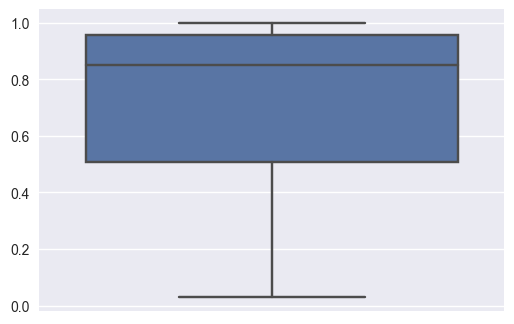

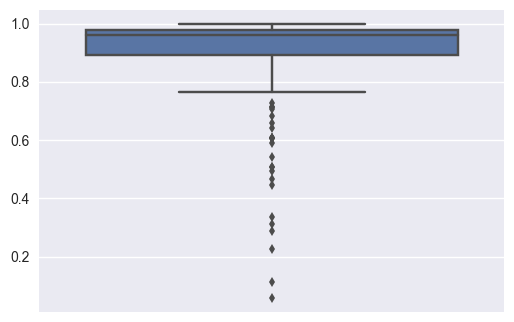

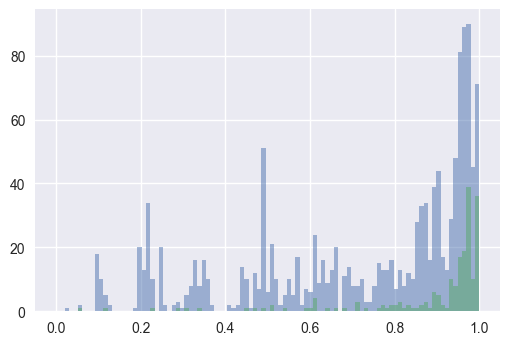

In [104]:
x1 = _a.get_edge_corr_dis()
count=0
while 1 in x1:
    x1.remove(1)
    count+=1

print(len(x1))
print(count)

x_1 = _a.get_node_value()
print(len(x_1))
count=0
while 1 in x_1:
    x_1.remove(1)
    count+=1
print(count)  
# corr_table = pd.DataFrame({'edge':x1, 'node':x_1})
from scipy.stats.mstats import mquantiles
sns.boxplot(x1, orient='v')
plt.show()
sns.boxplot(x_1, orient='v')
plt.show()

bins = np.linspace(0, 1, 100)
plt.hist(x1, bins, alpha=0.5)
plt.hist(x_1, bins, alpha=0.5)
plt.show()


In [102]:
x2 = _a.get_edge_onettest_dis()
print(x2)
# x2 = -np.log(x2)
# x3 = _a.get_edge_ttest_dis()
# x4 = _a.get_node_value('one_vs_rest_t')
# x4 = -np.log(x2)
# y = [random.gauss(4,2) for _ in range(400)]

# bins = np.linspace(0, 1, 100)
# plt.hist(x2, bins, alpha=0.5)
# # plt.hist(x4, bins, alpha=0.5)
# plt.show()

[25.328436022934504, 25.328436022934504, 1.1473332782283665, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 1.8128991387388762, nan, nan, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 11.28657553736862, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 22.326418382202579, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 12.563256013684549, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 11.926789427150485, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.328436022934504, 25.3284360

In [84]:
print(len(x2),sorted(x2))

2323 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.3908057128440472e-95, 7.7305272979103085e-73, 7.7305272979103085e-73, 7.7305272979103085e-73, 7.7305272979103085e-73, 7.7305272979103085e-73, 7.7305272979103085e-73, 2.5662855446610674e-66, 5.6420765212425582e-59, 4.0660490736807038e-58, 2.0703723424221542e-56, 3.1378223356434521e-55, 3.9919034264346668e-54, 3.3517431455327388e-53, 3.3517431455327388e-53, 3.3517431455327388e-53, 3.3517431455327388e-53, 2.9458773809540332e-51, 1.971981712170141e-50, 3.836066647590328e-50, 3.4548137174793307e-49, 2.353603982283539e-48, 2.353603982283539e-48, 2.5399630497623163e-46, 3.8871915371450299e-46, 1.8639275177863266e-45, 4.4537177507365209e-45, 9.6738598795618099e-45, 5.7928477244885182e-44, 5.9614723648106676e-44, 1.4275115844425869e-43, 1.436263043545

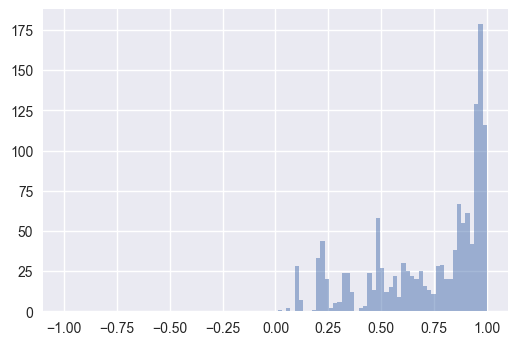

In [107]:
_corr = _a.get_edge_corr_dis()
while 1 in _corr:
    _corr.remove(1)
bins = np.linspace(-1, 1, 100)
plt.hist(_corr, bins, alpha=0.5)
# plt.hist(x_1, bins, alpha=0.5)
plt.show()

In [12]:
scoredMotifs_occurence_vector=[sum(i) for i in np.array(motif_existance_table)]
method='chi_squared'
relative='child'
motif_hierarchy = np.array(edge_list)
import hierarchical_enrichment
reload(hierarchical_enrichment)
dropper = motif_class.NodesDropper(nglycan_motif_lab.motif_dep_tree_ncore, motif_class.get_weight_dict(table_generator.table_against_wt_relative_abd()))
rep_quantile = hierarchical_enrichment.hier_enrich_glycoprofile_occurence(glycoprofile_list, scoredMotifs_occurence_vector, np.array(edge_list), nglycan_motif_lab.motif_vec)

In [13]:
# rep_quantile = [rep_quantile[i] for i in dropper.all_nodes]
quantile_table=pd.DataFrame(data=rep_quantile, columns=[0,0.25,0.5,0.75,1])
quantile_table.head()
quantile_table.fillna(1)

,0.0,0.25,0.5,0.75,1.0
0,--,--,--,--,--
1,--,--,--,--,--
2,--,--,--,--,--
3,--,--,--,--,--
4,--,--,--,--,--
5,--,--,--,--,--
6,--,--,--,--,--
7,--,--,--,--,--
8,--,--,--,--,--
9,--,--,--,--,--


/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/anaconda3/lib/python3.5/site-packages/pandas/core/common.py:1920: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/apple/ana

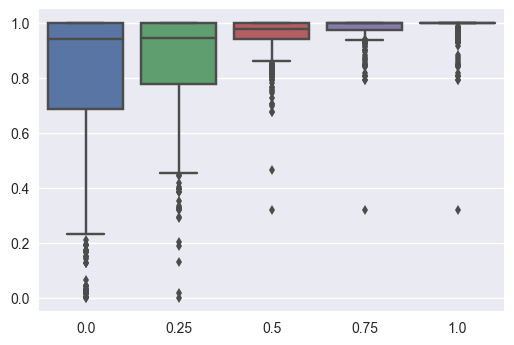

In [14]:
sns.boxplot(data=quantile_table)

In [9]:
rep_motif_p[51]

array([  4.99806144e-06,   1.86387358e-01,   9.31916796e-01,
         9.31916796e-01,   9.31916796e-01])

In [ ]:
pd.DataFrame(edge_list)